In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/daily-food-and-nutrition-dataset/daily_food_nutrition_dataset.csv


# Exploring Nutritional Patterns & Health Insights with Data Analysis

## Overview
This project explores daily food consumption patterns using a dataset of **10,000 food entries**, analyzing their **nutritional content**. I conducted **data cleaning, exploratory data analysis (EDA), and visualization** to uncover trends in **macronutrient intake, high-calorie foods, and unhealthy dietary habits**.

Using **Python (Pandas, Matplotlib, Seaborn)**, I extracted valuable insights into **caloric discrepancies, macronutrient distribution, and high-risk food items**, enabling better **dietary awareness**.

---

## 🔍 Key Objectives:
- **Macronutrient Breakdown**: Analyzing protein, carbohydrates, and fat distribution across meals.
- **Food Category Insights**: Identifying the highest calorie-contributing food groups.
- **High-Risk Foods**: Finding foods with excessive **sodium, cholesterol, and sugar**.
- **Trend Analysis Over Time**: Investigating how **calorie and nutrient intake fluctuates monthly**.
- **Comparison of Provided vs. Calculated Calories**: Assessing **data accuracy** in reported nutritional values.

---

## Data Cleaning & Preprocessing:
✔ Removed **duplicates** and **missing values**  
✔ Converted dates into **datetime format** for trend analysis  

---

In [2]:
import pandas as pd
df = pd.read_csv("../input/daily-food-and-nutrition-dataset/daily_food_nutrition_dataset.csv")

In [3]:
df.head()

,Date,User_ID,Food_Item,Category,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg),Meal_Type,Water_Intake (ml)
0,2024-09-11,496,Eggs,Meat,173,42.4,83.7,1.5,1.5,12.7,752,125,Lunch,478
1,2024-12-17,201,Apple,Fruits,66,39.2,13.8,3.2,2.6,12.2,680,97,Lunch,466
2,2024-06-09,776,Chicken Breast,Meat,226,27.1,79.1,25.8,3.2,44.7,295,157,Breakfast,635
3,2024-08-27,112,Banana,Fruits,116,43.4,47.1,16.1,6.5,44.1,307,13,Snack,379
4,2024-07-28,622,Banana,Fruits,500,33.9,75.8,47.0,7.8,19.4,358,148,Lunch,471


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               10000 non-null  object 
 1   User_ID            10000 non-null  int64  
 2   Food_Item          10000 non-null  object 
 3   Category           10000 non-null  object 
 4   Calories (kcal)    10000 non-null  int64  
 5   Protein (g)        10000 non-null  float64
 6   Carbohydrates (g)  10000 non-null  float64
 7   Fat (g)            10000 non-null  float64
 8   Fiber (g)          10000 non-null  float64
 9   Sugars (g)         10000 non-null  float64
 10  Sodium (mg)        10000 non-null  int64  
 11  Cholesterol (mg)   10000 non-null  int64  
 12  Meal_Type          10000 non-null  object 
 13  Water_Intake (ml)  10000 non-null  int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 1.1+ MB


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.describe()

,Date,User_ID,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg),Water_Intake (ml)
count,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2024-07-01 02:49:37.920000,498.706300,327.693900,25.523050,52.568550,25.43735,4.986940,25.052570,497.969000,151.886600,554.353600
min,2024-01-01 00:00:00,1.000000,50.000000,1.000000,5.000000,1.00000,0.000000,0.000000,0.000000,0.000000,100.000000
25%,2024-04-02 00:00:00,245.000000,190.000000,13.200000,28.800000,13.30000,2.500000,12.500000,249.750000,76.000000,327.000000
50%,2024-06-30 12:00:00,492.000000,328.000000,25.500000,52.800000,25.30000,5.000000,25.000000,495.000000,153.000000,555.500000
75%,2024-09-29 00:00:00,748.000000,464.000000,37.700000,76.400000,37.60000,7.500000,37.700000,749.000000,228.000000,783.000000
max,2024-12-31 00:00:00,1000.000000,600.000000,50.000000,100.000000,50.00000,10.000000,50.000000,1000.000000,300.000000,1000.000000
std,NaN,289.123477,158.194716,14.131993,27.387152,14.14532,2.864984,14.480605,287.988001,87.360643,260.977642


In [7]:
df.isnull().sum()

Date                 0
User_ID              0
Food_Item            0
Category             0
Calories (kcal)      0
Protein (g)          0
Carbohydrates (g)    0
Fat (g)              0
Fiber (g)            0
Sugars (g)           0
Sodium (mg)          0
Cholesterol (mg)     0
Meal_Type            0
Water_Intake (ml)    0
dtype: int64

In [8]:
df.duplicated().sum()

0

## 📊 Key Findings & Visualizations

### 1️⃣ Macronutrient Breakdown by Meal Type
**Analysis:** Different meal types have **distinct macronutrient compositions**.


In [9]:
meal_macronutrient_ratios = df.groupby("Meal_Type")[["Protein (g)","Carbohydrates (g)","Fat (g)"]].mean()

In [10]:
print(meal_macronutrient_ratios)

           Protein (g)  Carbohydrates (g)    Fat (g)
Meal_Type                                           
Breakfast    25.334428          52.362564  25.484408
Dinner       25.686736          52.163843  25.702197
Lunch        25.407077          52.639928  25.446321
Snack        25.670502          53.124480  25.108650


In [11]:
meal_macronutrient_ratios["Protein %"] = meal_macronutrient_ratios["Protein (g)"] * 4 / (meal_macronutrient_ratios["Protein (g)"] * 4 + meal_macronutrient_ratios["Carbohydrates (g)"] * 4 + meal_macronutrient_ratios["Fat (g)"] * 9) * 100

In [12]:
meal_macronutrient_ratios["Carbohydrates %"] = meal_macronutrient_ratios["Carbohydrates (g)"] * 4 / (meal_macronutrient_ratios["Protein (g)"] * 4 + meal_macronutrient_ratios["Carbohydrates (g)"] * 4 + meal_macronutrient_ratios["Fat (g)"] * 9) * 100

In [13]:
meal_macronutrient_ratios["Fat %"] = meal_macronutrient_ratios["Fat (g)"] * 9 / (meal_macronutrient_ratios["Protein (g)"] * 4 + meal_macronutrient_ratios["Carbohydrates (g)"] * 4 + meal_macronutrient_ratios["Fat (g)"] * 9) * 100

In [14]:
print(meal_macronutrient_ratios[["Protein %","Carbohydrates %","Fat %"]])

           Protein %  Carbohydrates %      Fat %
Meal_Type                                       
Breakfast  18.761113        38.776483  42.462404
Dinner     18.931778        38.446081  42.622141
Lunch      18.778157        38.905728  42.316115
Snack      18.974505        39.267277  41.758219


In [15]:
# Replace macronutrient composition in percentage format
meal_macronutrient_ratios = meal_macronutrient_ratios[["Protein %","Carbohydrates %","Fat %"]]

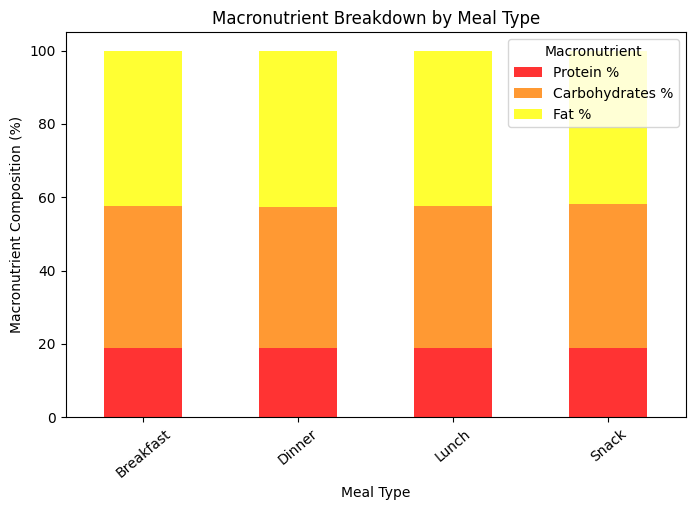

In [16]:
# Stacked bar chart: Macronutrient Breakdown by Meal Type 

import matplotlib.pyplot as plt

meal_macronutrient_ratios.plot(kind = "bar" , stacked = True, figsize = (8,5) , colormap = "autumn" , alpha = 0.8)

plt.xlabel("Meal Type")

plt.ylabel("Macronutrient Composition (%)")

plt.title("Macronutrient Breakdown by Meal Type")

plt.xticks(rotation = 40)

plt.legend(title = "Macronutrient", loc = "upper right")

plt.show()

**Insight** Each meal contributes different macronutrient ratios, which can affect dietary balance.
___

### 2️⃣ Food Category Contributions to Calorie Intake
**Analysis** : Some food categories contribute significantly more to daily **caloric intake.**

In [17]:
food_category_calories = df.groupby("Category")["Calories (kcal)"].mean().sort_values(ascending = False)

In [18]:
print(food_category_calories)

Category
Grains        333.234104
Beverages     332.231142
Snacks        332.157821
Fruits        329.162423
Meat          325.011989
Vegetables    321.518466
Dairy         320.671918
Name: Calories (kcal), dtype: float64


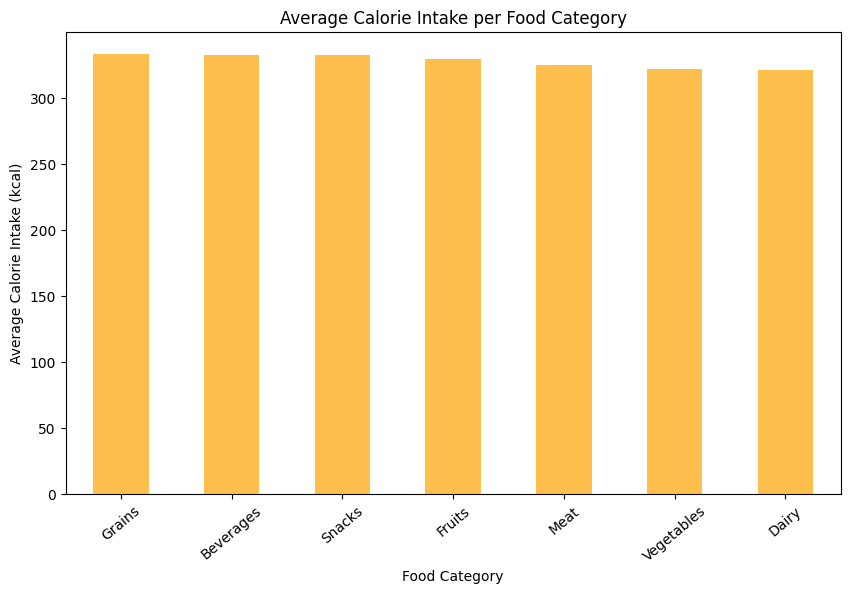

In [19]:
# Average calorie intake per food category

plt.figure(figsize=(10,6))

food_category_calories.plot(kind = "bar",color = "orange" , alpha = 0.7)

plt.xlabel("Food Category")

plt.ylabel("Average Calorie Intake (kcal)")

plt.title("Average Calorie Intake per Food Category")

plt.xticks(rotation = 40)

plt.show()

In [20]:
food_category_nutrient = df.groupby("Category")[["Sodium (mg)","Cholesterol (mg)","Sugars (g)"]].mean()

In [21]:
print(food_category_nutrient)

            Sodium (mg)  Cholesterol (mg)  Sugars (g)
Category                                             
Beverages    493.152941        149.925952   25.509896
Dairy        505.434932        151.412329   25.372945
Fruits       497.543703        153.171370   25.028217
Grains       493.075867        151.884393   24.851662
Meat         503.227786        153.408322   24.872567
Snacks       493.217179        153.342877   25.125559
Vegetables   499.955256        150.053267   24.580682


<Figure size 1200x600 with 0 Axes>

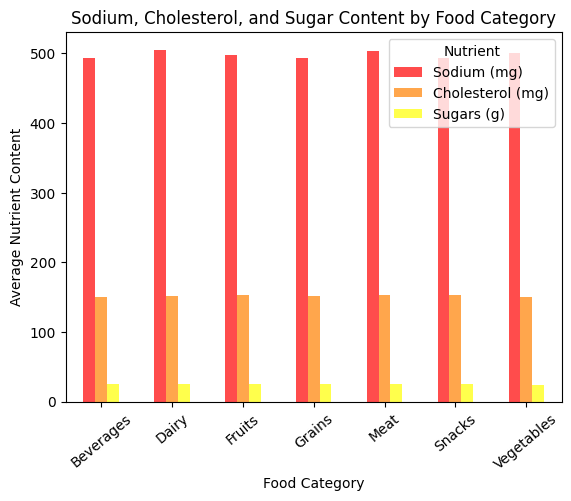

In [22]:
# Sodium, Cholesterol, and Sugar content per food category

plt.figure(figsize=(12,6))

food_category_nutrient.plot(kind = "bar", colormap = "autumn" , alpha = 0.7)

plt.xlabel("Food Category")

plt.ylabel("Average Nutrient Content")

plt.title("Sodium, Cholesterol, and Sugar Content by Food Category")

plt.xticks(rotation = 40)

plt.legend(title = "Nutrient" , loc = "upper right")

plt.show()

**Insights:** 

- Some categories, such as grains and dairy, contribute significantly more to daily calorie intake than vegetables or fruits.

- High sodium content is a concern across all food categories, potentially indicating a reliance on processed or salty foods.

- Cholesterol levels are relatively balanced but higher in animal-based foods, reinforcing the importance of moderation in dairy and meat consumption.

- Sugar intake is lower but still present in some categories, especially Beverages and Fruits, which may indicate added sugars in certain products.

  ---

### 3️⃣ High-Sodium, High-Cholesterol, and High-Sugar Foods
**Analysis:** Identifying top **high-risk** food items.

In [23]:
# Identifying Top High-Sodium, High-Cholesterol, and High-Sugar Foods

top_sodium_foods = df.sort_values(by = "Sodium (mg)" , ascending= False).head(10)

print(top_sodium_foods)

           Date  User_ID  Food_Item    Category  Calories (kcal)  Protein (g)  \
5321 2024-06-06      718     Coffee   Beverages              576         18.3   
1130 2024-12-21       28  Chocolate      Snacks              535          4.5   
3596 2024-08-11      132     Cheese       Dairy              337         48.8   
3762 2024-05-04      217     Tomato  Vegetables              131         29.1   
7374 2024-09-04      123       Nuts      Snacks              160          1.4   
4268 2024-01-02      419     Quinoa      Grains               71          7.0   
1709 2024-04-11      584       Nuts      Snacks              212         26.8   
5063 2024-11-26      124    Spinach  Vegetables              469          4.9   
9617 2024-07-05      368     Butter       Dairy              124         31.7   
9794 2024-08-08       84     Salmon        Meat              148         23.9   

      Carbohydrates (g)  Fat (g)  Fiber (g)  Sugars (g)  Sodium (mg)  \
5321               67.1     29.9    

In [24]:
top_cholesterol_foods = df.sort_values(by = "Cholesterol (mg)" , ascending = False).head(10)
print(top_cholesterol_foods)

           Date  User_ID  Food_Item    Category  Calories (kcal)  Protein (g)  \
2337 2024-07-06       69    Popcorn      Snacks              183         43.7   
9132 2024-03-23      239      Chips      Snacks              215         42.9   
4205 2024-11-03      930  Pork Chop        Meat              180         25.4   
6104 2024-10-18      906     Cheese       Dairy              390         36.9   
5761 2024-11-15      308     Coffee   Beverages              439         19.0   
8844 2024-01-29      857  Pork Chop        Meat              539         45.2   
5772 2024-06-27      292       Rice      Grains              185         12.1   
4747 2024-07-20      823       Rice      Grains              183         34.2   
3202 2024-03-02      931  Pork Chop        Meat              346         31.6   
3750 2024-02-19       44     Tomato  Vegetables              415         33.1   

      Carbohydrates (g)  Fat (g)  Fiber (g)  Sugars (g)  Sodium (mg)  \
2337               79.6      7.5    

In [25]:
top_sugar_foods = df.sort_values(by="Sugars (g)", ascending=False).head(10)
print(top_sugar_foods)

           Date  User_ID       Food_Item   Category  Calories (kcal)  \
1071 2024-09-22      158      Beef Steak       Meat              461   
3954 2024-04-01      668      Beef Steak       Meat              333   
3786 2024-06-14      931           Bread     Grains              540   
6055 2024-07-14      422    Orange Juice  Beverages              556   
6040 2024-06-11      250  Chicken Breast       Meat              372   
4286 2024-11-13      372           Water  Beverages              163   
5668 2024-08-18      772       Pork Chop       Meat              130   
8834 2024-09-20       88         Cookies     Snacks              159   
7985 2024-05-16      506            Nuts     Snacks              578   
2313 2024-06-29      188  Chicken Breast       Meat              331   

      Protein (g)  Carbohydrates (g)  Fat (g)  Fiber (g)  Sugars (g)  \
1071         43.1               15.5     36.6        6.2        50.0   
3954         17.5               56.1     13.4        2.2       

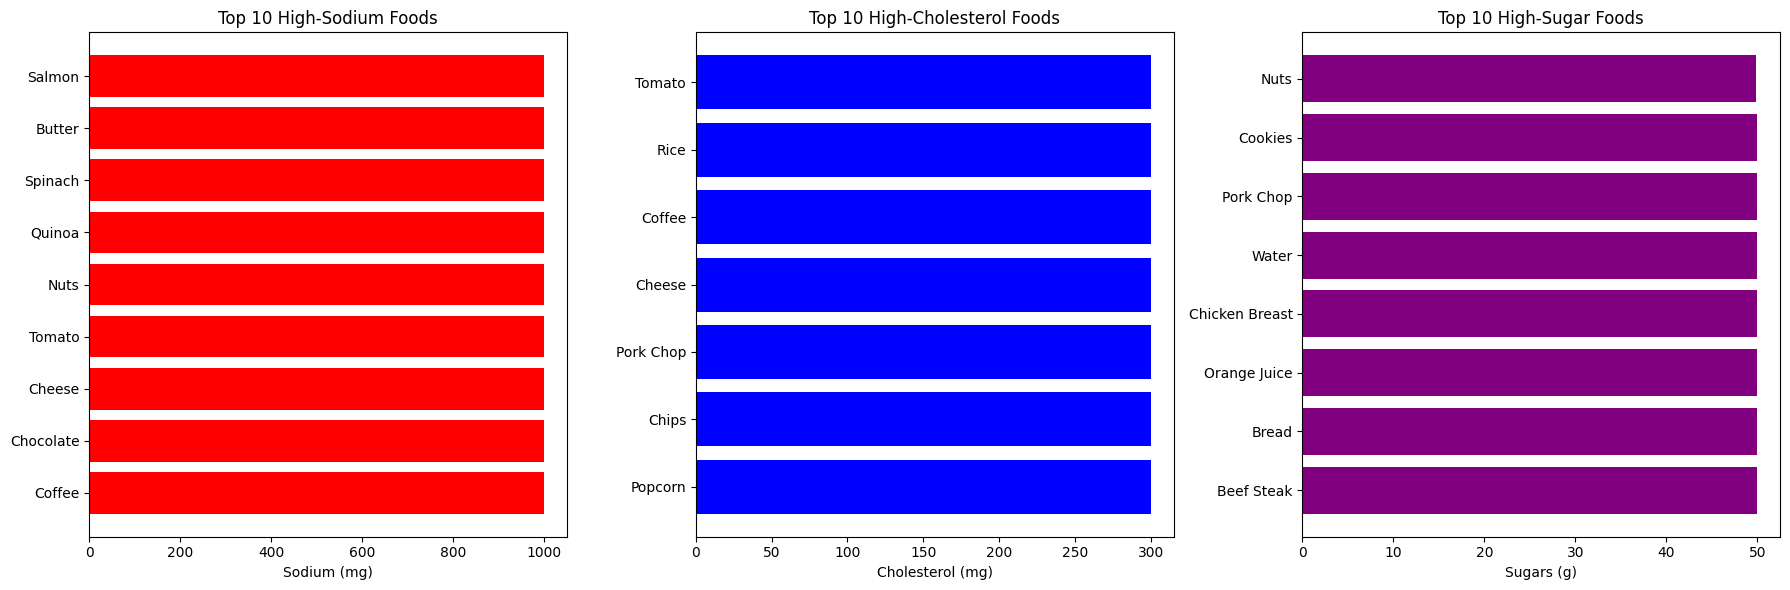

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(18,6))

# High Sodium Foods

axes[0].barh(top_sodium_foods["Food_Item"], top_sodium_foods["Sodium (mg)"], color="red")

axes[0].set_xlabel("Sodium (mg)")

axes[0].set_title("Top 10 High-Sodium Foods")

# High Cholesterol Foods

axes[1].barh(top_cholesterol_foods["Food_Item"], top_cholesterol_foods["Cholesterol (mg)"], color="blue")

axes[1].set_xlabel("Cholesterol (mg)")

axes[1].set_title("Top 10 High-Cholesterol Foods")

# High Sugar Foods

axes[2].barh(top_sugar_foods["Food_Item"], top_sugar_foods["Sugars (g)"], color="purple")

axes[2].set_xlabel("Sugars (g)")

axes[2].set_title("Top 10 High-Sugar Foods")

plt.tight_layout()

plt.show()

**Insights:** 

- Certain natural foods like salmon, cheese, and spinach have high sodium content, alongside some processed items like butter and chocolate. 

- While dairy (cheese) and meat (pork chop) contain cholesterol, some unexpected items like tomato and coffee also appear on the list, possibly due to data inconsistencies. 

- Sugary beverages like orange juice and desserts (cookies) contain high sugar levels, though some listed items (like pork chop and water) may require further investigation.

  ---

### 4️⃣ Nutritional Trends Over Time
**Analysis:** How **calories and nutrients change over time.**

In [27]:
df["Year-Month"] = df["Date"].dt.to_period("M")

In [28]:
trend_analysis = df.groupby("Year-Month")[["Calories (kcal)", "Protein (g)", "Carbohydrates (g)", "Fat (g)"]].mean()

In [29]:
print(trend_analysis)

            Calories (kcal)  Protein (g)  Carbohydrates (g)    Fat (g)
Year-Month                                                            
2024-01          335.301606    26.140482          52.321216  24.951491
2024-02          318.535912    24.621271          54.994613  25.567403
2024-03          339.788684    25.089261          51.608776  25.216975
2024-04          317.116029    25.172488          53.105981  25.577512
2024-05          320.698824    25.581294          53.556588  26.015529
2024-06          331.414319    26.322887          52.161854  24.710915
2024-07          327.134571    25.558585          52.987703  25.783295
2024-08          325.244946    26.147562          52.791082  25.517122
2024-09          330.686905    25.320119          51.067857  25.055595
2024-10          325.902728    25.453974          52.655160  25.612574
2024-11          321.921189    24.875065          52.630749  26.277519
2024-12          336.202381    25.792857          51.305119  25.065952


<Figure size 1200x600 with 0 Axes>

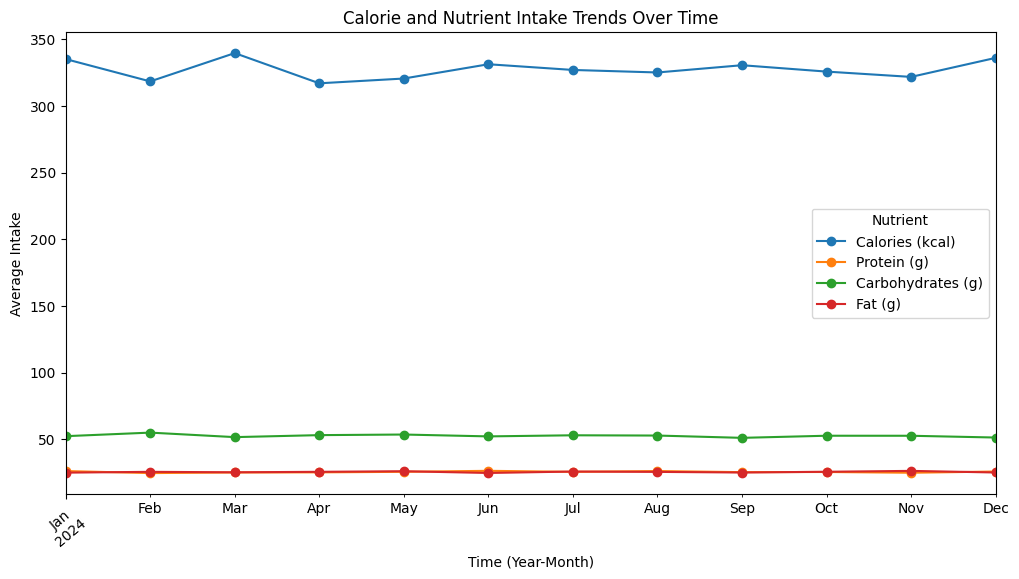

In [30]:
# Calorie and nutrient trends over time

plt.figure(figsize=(12,6))

trend_analysis.plot(marker = 'o' , figsize = (12,6))

plt.xlabel("Time (Year-Month)")

plt.ylabel("Average Intake")

plt.title("Calorie and Nutrient Intake Trends Over Time")

plt.xticks(rotation = 40)

plt.legend(title = "Nutrient")

plt.show()

**Insights:** 

Some months have higher calorie consumption, possibly due to holidays, seasonal food availability, or lifestyle changes. 

The overall diet composition remains stable, implying no major dietary shifts in macronutrient intake. 

---

### 5️⃣ Comparison of Provided vs. Calculated Calories
**Analysis:** Checking for **caloric discrepancies.**

Calories are derived from macronutrients using the following standard values:

- **Protein:** 4 kcal per gram

- **Carbohydrates:* 4 kcal per gram

- **Fat:** 9 kcal per gram

Thus, the calculated calorie formula is:

**Calories = (Protein×4) + (Carbohydrates×4) + (Fat×9)**

In [31]:
df['Calculated_Calories'] = df['Protein (g)'] * 4 + df['Carbohydrates (g)'] * 4 + df['Fat (g)'] * 9

df['Macronutrient_Percentage'] = df['Calculated_Calories'] / df['Calories (kcal)'] * 100

In [32]:
df['Macronutrient_Percentage'].describe()

count    10000.000000
mean       242.220590
std        220.516332
min         12.619926
25%        111.768280
50%        164.712034
75%        280.105272
max       1739.259259
Name: Macronutrient_Percentage, dtype: float64

In [33]:
(df['Macronutrient_Percentage'] > 150).sum()

5577

Text(0.5, 1.0, 'Comparison of Provided vs. Calculated Calories')

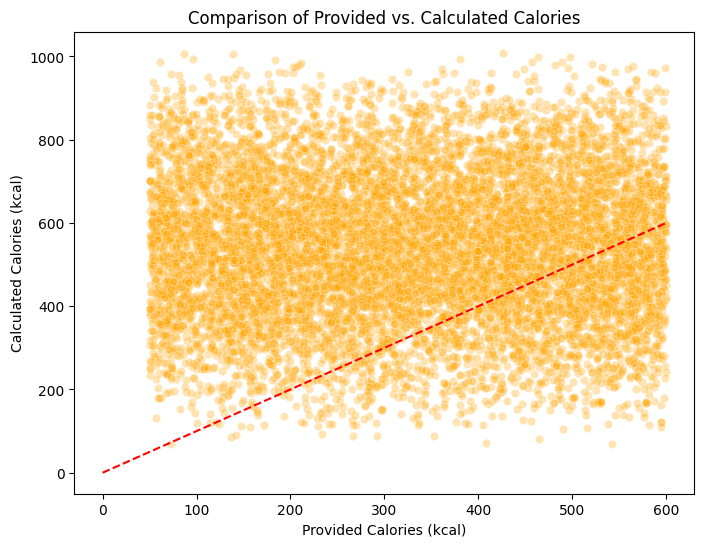

In [34]:
import seaborn as sns

plt.figure(figsize=(8,6))

sns.scatterplot(x = df['Calories (kcal)'] , y = df['Calculated_Calories'] , alpha = 0.3 , color = 'orange')

plt.plot([0, df['Calories (kcal)'].max()], [0, df['Calories (kcal)'].max()], color='red', linestyle='--', label="Ideal Line")

plt.xlabel("Provided Calories (kcal)")

plt.ylabel("Calculated Calories (kcal)")

plt.title("Comparison of Provided vs. Calculated Calories")

**Insights:** 

- There is a pattern of underreported calorie values, suggesting potential inaccuracies in the dataset. 

- Food items with lower reported calories tend to have a much higher calculated calorie range, which could indicate missing data or incorrect food labeling. 

- Further investigation is needed to determine if specific food categories have the highest discrepancies and whether certain macronutrients are consistently missing or underestimated.

  ---

**Technical Tools and Skills**

- Data Cleaning & Preprocessing

- Data Visualization & Storytelling

- Python (Pandas, Matplotlib, Seaborn)

- Jupyter Notebook


---

**Next Steps**

- **Further Investigate High Discrepancy Foods:** Identify specific food categories or items with the largest calorie misreporting.

- **Expand Analysis to Dietary Impact:** Investigate how these trends affect health metrics like BMI and nutritional balance.

- **Develop a Predictive Model:** Use machine learning to estimate missing nutritional values.

---